# Import modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
import pickle
from xgboost import XGBClassifier

# Load dataset

Base version

In [22]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["txt_records","srv_records","soa_records","ptr_records","ns_records","naptr_records","mx_records","cname_records","aaaa_records", "a_records", "self_signed","lat","lon"], axis=1)

Base version + GeoIP

In [36]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["txt_records","srv_records","soa_records","ptr_records","ns_records","naptr_records","mx_records","cname_records","aaaa_records", "a_records", "self_signed"], axis=1)

Base version + SSL

In [50]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["txt_records","srv_records","soa_records","ptr_records","ns_records","naptr_records","mx_records","cname_records","aaaa_records", "a_records","lat","lon"], axis=1)

Base version + DNS

In [64]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["self_signed","lat","lon"], axis=1)

Base version + Geo + SSL

In [80]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["txt_records","srv_records","soa_records","ptr_records","ns_records","naptr_records","mx_records","cname_records","aaaa_records", "a_records"], axis=1)

Base version + Geo + DNS

In [94]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["self_signed"], axis=1)

Base version + DNS + SSL

In [108]:
df = pd.read_csv('./dataset.csv')
df = df.drop(["lat","lon"], axis=1)

Full version

In [122]:
df = pd.read_csv('./dataset.csv')

# View amount of records and the split

In [123]:
df['status'].value_counts()

status
1    3085
0    3000
Name: count, dtype: int64

# Drop string fields

In [124]:
df = df.drop(['url','ip'], axis=1)


df['status'].value_counts()


status
1    3085
0    3000
Name: count, dtype: int64

# Create correlation matrix

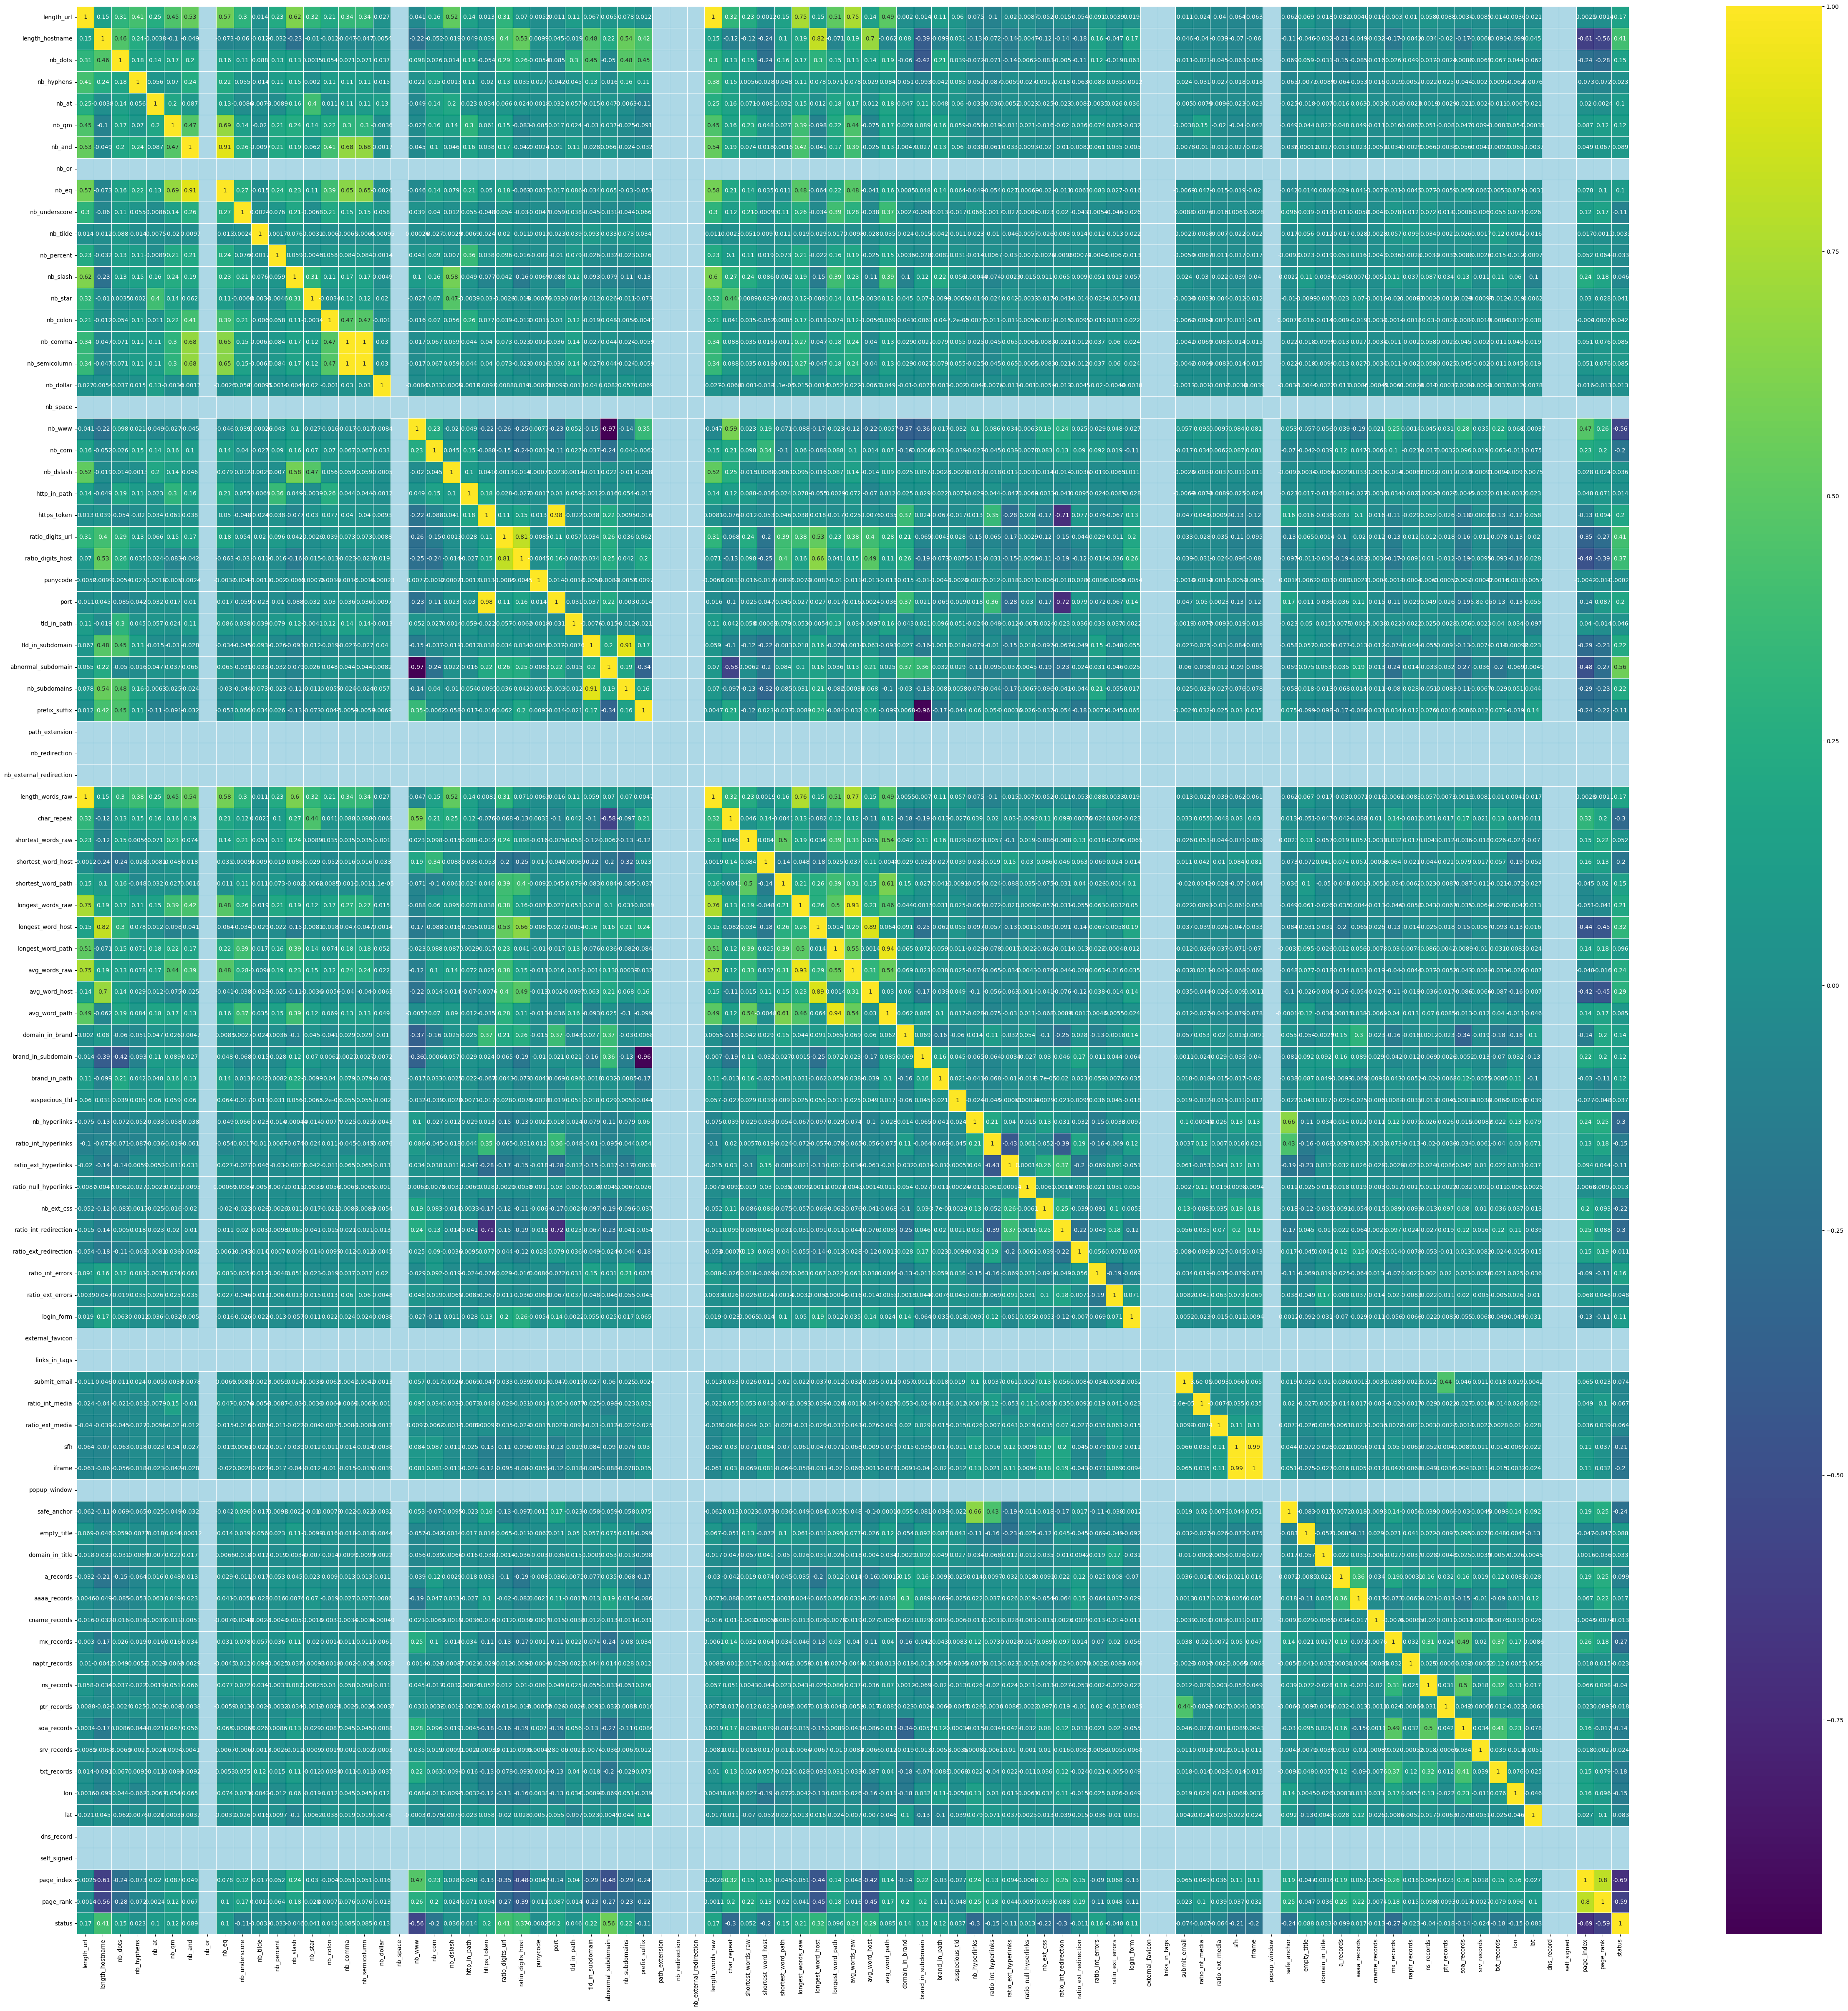

In [125]:
corr_matrix = df.corr()
plt.figure(figsize=(60,60))
color = plt.get_cmap('viridis').copy()   # default color
color.set_bad('lightblue') 
sns.heatmap(corr_matrix, annot=True, linewidth=0.4, cmap=color)
plt.savefig('heatmap')
plt.show()

In [126]:
corr_matrix['status']


length_url         0.166387
length_hostname    0.405201
nb_dots            0.146337
nb_hyphens         0.022884
nb_at              0.100051
                     ...   
dns_record              NaN
self_signed             NaN
page_index        -0.692778
page_rank         -0.590735
status             1.000000
Name: status, Length: 89, dtype: float64

# Select the relevant features

In [127]:
target_corr = corr_matrix['status']
target_corr

length_url         0.166387
length_hostname    0.405201
nb_dots            0.146337
nb_hyphens         0.022884
nb_at              0.100051
                     ...   
dns_record              NaN
self_signed             NaN
page_index        -0.692778
page_rank         -0.590735
status             1.000000
Name: status, Length: 89, dtype: float64

In [128]:
threshold=0.1
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist()
relevant_features

len(relevant_features)

45

In [129]:
X = df[relevant_features]
X = X.drop('status', axis=1)
y = df['status']

# Split data into test and training data

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [131]:
scaler = StandardScaler()


In [132]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


# Create and train model

In [133]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

RandomForestClassifier()

# Predict test data

In [134]:
rf_predict = rf.predict(X_test_scaled)


# report score

In [135]:
accuracy = accuracy_score(y_test,rf_predict)
print("Accuracy:{}%".format(accuracy *100, 1))

Accuracy:96.05587510271158%


# Save model

In [21]:
filename = 'phishing_detection_model.sav'
pickle.dump(rf, open(filename, 'wb'))